In [1]:
!pip install caer canaro


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 34.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.0
    Uninstalling ten

In [2]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [3]:
IMG_SIZE = (80,80)
channels =1 # colours
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'
#base path

In [4]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path)))
    # going through each folder and getting numbers of each folder and store in dictionary
    
#sort dictionary in descending order
char_dict = caer.sort_dict(char_dict,descending = True)
char_dict
    


[('rainier_wolfcastle', 43),
 ('maggie_simpson', 43),
 ('krusty_the_clown', 43),
 ('waylon_smithers', 43),
 ('professor_john_frink', 43),
 ('fat_tony', 43),
 ('ralph_wiggum', 43),
 ('otto_mann', 43),
 ('martin_prince', 43),
 ('barney_gumble', 43),
 ('ned_flanders', 43),
 ('patty_bouvier', 43),
 ('sideshow_mel', 43),
 ('marge_simpson', 43),
 ('abraham_grampa_simpson', 43),
 ('selma_bouvier', 43),
 ('mayor_quimby', 43),
 ('disco_stu', 43),
 ('lionel_hutz', 43),
 ('simpsons_dataset', 43),
 ('troy_mcclure', 43),
 ('agnes_skinner', 43),
 ('groundskeeper_willie', 43),
 ('kent_brockman', 43),
 ('charles_montgomery_burns', 43),
 ('carl_carlson', 43),
 ('chief_wiggum', 43),
 ('apu_nahasapeemapetilon', 43),
 ('bart_simpson', 43),
 ('edna_krabappel', 43),
 ('gil', 43),
 ('comic_book_guy', 43),
 ('principal_skinner', 43),
 ('cletus_spuckler', 43),
 ('milhouse_van_houten', 43),
 ('snake_jailbird', 43),
 ('nelson_muntz', 43),
 ('lisa_simpson', 43),
 ('lenny_leonard', 43),
 ('moe_szyslak', 43),
 ('mi

In [5]:
#store first ten in a list
characters =[]
count =0
for i in char_dict:
    characters.append(i[0])
    count+= 1
    if count >=10:
        break
characters        
        
        

['rainier_wolfcastle',
 'maggie_simpson',
 'krusty_the_clown',
 'waylon_smithers',
 'professor_john_frink',
 'fat_tony',
 'ralph_wiggum',
 'otto_mann',
 'martin_prince',
 'barney_gumble']

In [6]:
#creation of training data
#this goes through every folder in char_path i.e simpsons dataset and look through
#ex looks for rainier in simpsons dataset
train = caer.preprocess_from_dir(char_path,characters,channels=channels, IMG_SIZE = IMG_SIZE,isShuffle =True)
#trainig set is a list and each element is also a list
#mapping


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] 45 files found in 0.021829605102539062s
[INFO] 128 files found in 0.06393241882324219s
[INFO] At 1000 files
[INFO] 1206 files found in 0.7139759063720703s
[INFO] 181 files found in 0.13119959831237793s
[INFO] 65 files found in 0.036995649337768555s
[INFO] 27 files found in 0.010294675827026367s
[INFO] 89 files found in 0.04787802696228027s
[INFO] 32 files found in 0.02050018310546875s
[INFO] 71 files found in 0.027734041213989258s
[INFO] 106 files found in 0.053206682205200195s
----------------------------------------------
[INFO] 1950 files preprocessed! Took 0m 22s


In [7]:
len(train)

1950

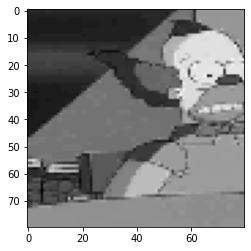

In [8]:
import matplotlib.pyplot as plt
#plt.figure(figsize(30,30))
plt.imshow(train[0][0],cmap = 'gray')
plt.show()


In [9]:
#training set is now a list we need to seperate as list and features
featureSet,labels = caer.sep_train(train,IMG_SIZE=IMG_SIZE)


In [10]:
from tensorflow.keras.utils import to_categorical
#normalize feature set in range (0,1)
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels,len(characters))


In [11]:
#training and validation data
x_train,x_val,y_train,y_val = caer.train_val_split(featureSet,labels,val_ratio = 0.2)

In [12]:
#removing variables which arent useful to save memory
del train
del featureSet
del labels
gc.collect()

21

In [13]:
BATCH_SIZE =32
EPOCHS = 10

In [14]:
#image data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [15]:
#creating the model
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE,channels = channels, output_dim =len(characters),
                                         loss = 'binary_crossentropy',decay = 1e-6,learning_rate =.001,
                                         momentum = 0.9,nesterov=True)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [
    LearningRateScheduler(canaro.lr_schedule)]

In [18]:

training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
48/48 [==============================] - 9s 44ms/step - loss: 0.3337 - accuracy: 0.5966 - val_loss: 0.2466 - val_accuracy: 0.5806
Epoch 2/10
48/48 [==============================] - 1s 27ms/step - loss: 0.2190 - accuracy: 0.6274 - val_loss: 0.2403 - val_accuracy: 0.5806
Epoch 3/10
48/48 [==============================] - 1s 27ms/step - loss: 0.2161 - accuracy: 0.6326 - val_loss: 0.2378 - val_accuracy: 0.5806
Epoch 4/10
48/48 [==============================] - 1s 27ms/step - loss: 0.2176 - accuracy: 0.6293 - val_loss: 0.2403 - val_accuracy: 0.5806
Epoch 5/10
48/48 [==============================] - 1s 27ms/step - loss: 0.2163 - accuracy: 0.6270 - val_loss: 0.2362 - val_accuracy: 0.5806
Epoch 6/10
48/48 [==============================] - 2s 32ms/step - loss: 0.2158 - accuracy: 0.6293 - val_loss: 0.2396 - val_accuracy: 0.5806
Epoch 7/10
48/48 [==============================] - 1s 27ms/step - loss: 0.2163 - accuracy: 0.6289 - val_loss: 0.2371 - val_accuracy: 0.5806
Epoch 8/10
48

In [19]:
#use opencv to test how good our project is
characters


['rainier_wolfcastle',
 'maggie_simpson',
 'krusty_the_clown',
 'waylon_smithers',
 'professor_john_frink',
 'fat_tony',
 'ralph_wiggum',
 'otto_mann',
 'martin_prince',
 'barney_gumble']

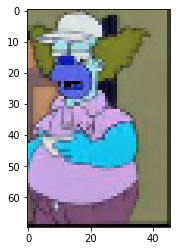

krusty_the_clown


In [20]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_1.jpg'
img = cv.imread(test_path)
# plt.imshow(img,cmap='gray')
# plt.show()
plt.imshow(img)
plt.show()


def prepare(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img = cv.resize(img,IMG_SIZE)
    img = caer.reshape(img,IMG_SIZE,1)
    return img
predictions = model.predict(prepare(img))

# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])
